In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
pd.isna(data).sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#define categorical and numerical columns
categorical_cols = ['sex','smoker','region']
numerical_cols = ['age','bmi','children']

*creating preprocessor pipeline for both numerical and categorical data*

In [9]:
numeric_transformer = Pipeline(steps = [
                          ('scaler',StandardScaler())
])

categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(
                   transformers = [
                       ('num',
                       numeric_transformer,numerical_cols),
                       ('cat',categorical_transformer,categorical_cols)
                   ])


In [11]:
X = data.drop('charges',axis = 1)
y = data['charges']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

*Create and evalute the model*

In [16]:
model = Pipeline(steps=[('preprocessor',preprocessor),
                        ('regressor',LinearRegression())])
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

*predict and evaluate*

In [24]:
y_pred = model.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred))
print("R-Squared:",r2_score(y_test,y_pred))


MSE: 33596915.85136147
R-Squared: 0.7835929767120723


*Apply regularization techniques*

In [20]:
ridge_model = Pipeline(steps = [('preprocessor',preprocessor),
                               ('regressor',Ridge(alpha = 1.0))])
ridge_model.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
print("Ridge MSE: ",mean_squared_error(y_test,ridge_pred))
print("Ridge R-squared: ",r2_score(y_test,ridge_pred))


lasso_model = Pipeline(steps = [('preprocessor',preprocessor),
                               ('regressor',Lasso(alpha = 0.1))])
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)

print("Lasso MSE: ",mean_squared_error(y_test,lasso_pred))
print("Lasso R-squared: ",r2_score(y_test,lasso_pred))



Ridge MSE:  33620268.9209166
Ridge R-squared:  0.7834425531348183
Lasso MSE:  33597196.116748095
Lasso R-squared:  0.783591171445234


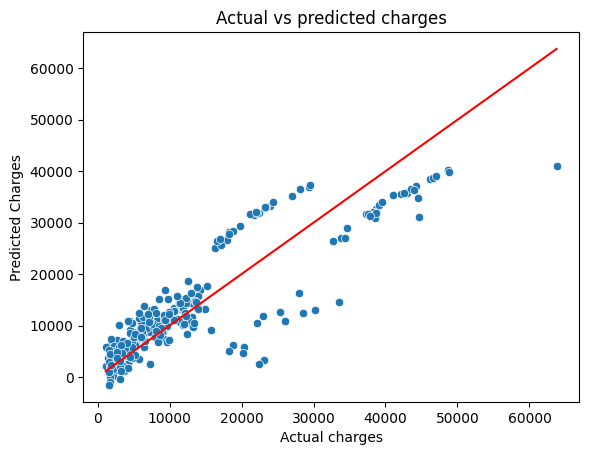

In [22]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs predicted charges')
plt.plot([min(y_test),max(y_test)],
         [min(y_test),max(y_test)],color ='red')
plt.show()

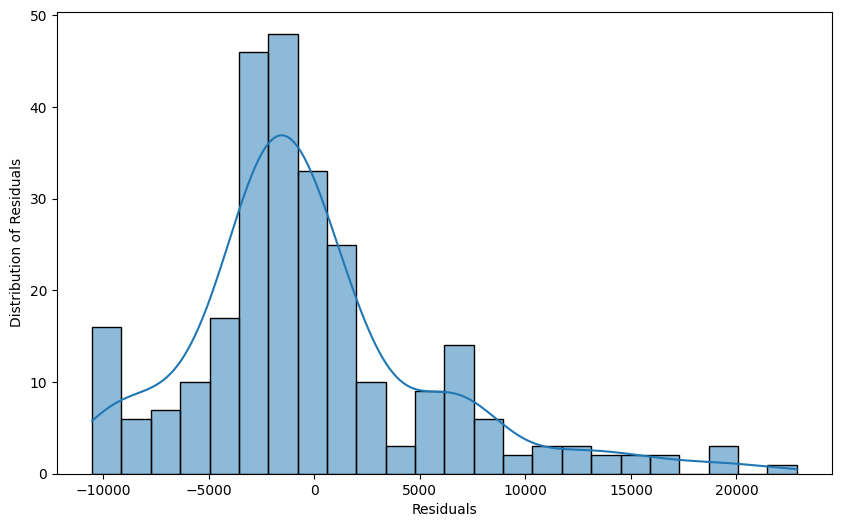

In [23]:
#residual 
residuals = y_test - y_pred

#plot
plt.figure(figsize=(10,6))
sns.histplot(residuals,kde = True)
plt.xlabel('Residuals')
plt.ylabel('Distribution of Residuals')
plt.show()